The angle picked:  4.838052686528282 radians
a =  0.125  b =  -0.992

a*a =  0.016  b*b =  0.984


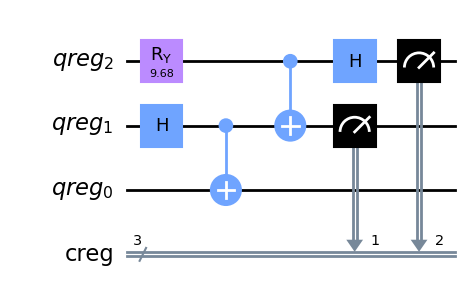

The state vector is: 
0.0
-0.0
-0.0
0.0
0.12533323356430423
0.9921147013144779
0.0
0.0

The classical outcome is:  10

the new quantum state is |10>(0.125|0>+0.992|1>)
the new quantum state is |10>(+a|0>-b|1>)


C:\Users\jrnat\AppData\Local\Temp\ipykernel_2564\3136544620.py:48: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level = 0, shots = 1)


In [7]:
#To learn about Quantum Teleportation

#Importing depenedencies

from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, execute
from math import pi,cos,sin
from random import randrange

#Creating the quantum circuit

q  = QuantumRegister(3,"qreg")
c = ClassicalRegister(3,"creg")
qc = QuantumCircuit(q,c)


#Rotating up the qubit state q[2]
r = randrange(100)
theta = 2*pi*(r/100)
print("The angle picked: ",theta, "radians")

a = cos(theta)
b = sin(theta)
print("a = ",round(a,3), " b = ",round(b,3))
print()
print("a*a = ",round(a**2,3), " b*b = ",round(b**2,3))
qc.ry(2*theta, q[2])

#Creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

#CNOT operator on the q[2] Control qubit of Asja
qc.cx(q[2],q[1])

#Hadamard operator by Asja on q[2]
qc.h(q[2])

#Measuring the results
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])

#Drawing the circuit
display(qc.draw(output = 'mpl', reverse_bits = True))


#Reading the statevector

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level = 0, shots = 1)

current_quantum_state = job.result().get_statevector(qc).data

print("The state vector is: ")

for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()


classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real !=0) or (current_quantum_state[2*i+1].real != 0):
        print("The classical outcome is: ",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]

print()

readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)
